Aryan Saxena

U21EC068

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 20ms/step - loss: 0.0353
Epoch 2/100
94/94 - 1s - 6ms/step - loss: 0.0177
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0159
Epoch 4/100
94/94 - 0s - 4ms/step - loss: 0.0144
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0128
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0112
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0096
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0080
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0065
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0051
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0041
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0033
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0027
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0022
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 21/100
94/94 -

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train Score: 22.68 RMSE
Test Score: 50.09 RMSE


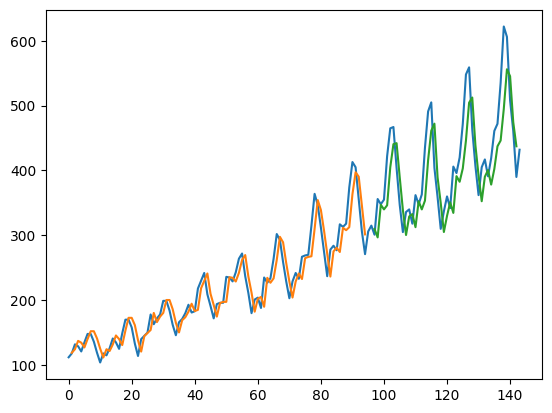

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()